<a href="https://colab.research.google.com/github/kalyanyatam/ML-projects/blob/main/plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/nandakishormpai2001/Plant_Disease_Detector/raw/main/model/dataset.zip

--2025-02-19 15:31:13--  https://github.com/nandakishormpai2001/Plant_Disease_Detector/raw/main/model/dataset.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/nandakishormpai/Plant_Disease_Detector/raw/main/model/dataset.zip [following]
--2025-02-19 15:31:13--  https://github.com/nandakishormpai/Plant_Disease_Detector/raw/main/model/dataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nandakishormpai/Plant_Disease_Detector/main/model/dataset.zip [following]
--2025-02-19 15:31:13--  https://raw.githubusercontent.com/nandakishormpai/Plant_Disease_Detector/main/model/dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubuserc

In [2]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/train/
   creating: dataset/train/Cherry___Powdery_mildew/
  inflating: dataset/train/Cherry___Powdery_mildew/00b7df55-c789-43d6-a02e-a579ac9d07e6___FREC_Pwd.M 4748.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/00d12ac0-a293-47e0-a4c6-a80f37204c39___FREC_Pwd.M 4812.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/00d12ac0-a293-47e0-a4c6-a80f37204c39___FREC_Pwd.M 4812_flipLR.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/00e0a4ab-ecbd-4560-a71c-b19d86bb087c___FREC_Pwd.M 4917_flipLR.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/00f8611c-0f2c-4f24-8241-d1748c8bb48f___FREC_Pwd.M 0479.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/00f8611c-0f2c-4f24-8241-d1748c8bb48f___FREC_Pwd.M 0479_flipLR.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/0a283423-3a6d-43a4-92e5-267c8153ca45___FREC_Pwd.M 4921_flipLR.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/0a5aacba-0363

In [3]:
!pip install -r requirements.txt

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.8.0+cpu (from versions: 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.1.0+cu121.with.pypi.cudnn, 2.1.0+rocm5.5, 2.1.0+rocm5.6, 2.1.1, 2.1.1+cpu, 2.1.1+cpu.cxx11.abi, 2.1.1+cu118, 2.1.1+cu121, 2.1.1+cu121.with.pypi.cudnn, 2.1.1+rocm5.5, 2.1.1+rocm5.6, 2.1.2, 2.1.2+cpu, 2.1.2+cpu.cxx11.abi, 2.1.2+cu118, 2.1.2+cu121, 2.1.2+cu121.with.pypi.cudnn, 2.1.2+rocm5.5, 2.1.2+rocm5.6, 2.2.0, 2.2.0+cpu, 2.2.0+cpu.cxx11.abi, 2.2.0+cu118, 2.2.0+cu121, 2.2.0+rocm5.6, 2.2.0+r

In [4]:
from PIL import Image
import torch
import torchvision
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import pickle

In [5]:
class Dataset():
    def __init__(self):
        self.labels,self.images = self.load_data()

    # To load images and labels for dataloader
    def load_data(self):
        labels={}
        images = {}
        count = 0
        # setting resize dimensions
        resize = transforms.Compose([transforms.Resize((256,256))])
        main_dir = os.listdir(os.path.join("dataset","train"))
        reference = {}
        # iterating through categories
        for i,dir in enumerate(main_dir):
            reference[dir]=i
            images_list = os.listdir(os.path.join("dataset","train",dir))
            local_cnt = 0
            # iterating through images in a category
            for img in images_list:
                # 500 images from each category
                if local_cnt<500:
                    labels[count] = i
                    img_path = os.path.join("dataset","train",dir,img)
                    image = Image.open(img_path)
                    image = ToTensor()(image)
                    images[count] = resize(image)
                    count+=1
                    local_cnt+=1
                else:
                    break

        print(reference)
        return labels,images

    def __len__(self):
        return len(self.labels)


    # To return x,y values in each iteration over dataloader as batches.
    def __getitem__(self, idx):
        return (
            self.images[idx],
            self.labels[idx],
        )

In [6]:
# Inherit from Dataset class
class ValDataset(Dataset):

    def load_data(self):
          labels={}
          images = {}
          count = 0
          resize = transforms.Compose([transforms.Resize((256,256))])
          main_dir = os.listdir(os.path.join("dataset","valid"))
          for i,dir in enumerate(main_dir):
              print(i,dir)
              images_list = os.listdir(os.path.join("dataset","valid",dir))
              local_cnt = 0
              for img in images_list:
                  if(local_cnt<100):
                      labels[count] = i
                      img_path = os.path.join("dataset","valid",dir,img)
                      image = Image.open(img_path)
                      image = ToTensor()(image)
                      images[count] = resize(image)
                      count+=1
                      local_cnt+=1
                  else:
                      break

          return labels,images


In [7]:
# Model Architecture
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()

        # CNNs for rgb images
        self.conv1= nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5)
        self.conv2= nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        self.conv3= nn.Conv2d(in_channels=12,out_channels=24,kernel_size=5)
        self.conv4= nn.Conv2d(in_channels=24,out_channels=48,kernel_size=5)

        # Connecting CNN outputs with Fully Connected layers
        self.fc1 = nn.Linear(in_features=48*12*12,out_features=240)
        self.fc2 = nn.Linear(in_features=240,out_features=120)
        self.out = nn.Linear(in_features=120,out_features=17)


    def forward(self,t):
        t = t

        t=self.conv1(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size = 2, stride = 2)


        t=self.conv2(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size = 2, stride = 2)

        t=self.conv3(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size = 2, stride = 2)

        t=self.conv4(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size = 2, stride = 2)

        t=t.reshape(-1,48*12*12)
        t=self.fc1(t)
        t=F.relu(t)


        t=self.fc2(t)
        t=F.relu(t)

        t=self.out(t)


        return t

In [8]:
model = Network()

In [9]:
dataset = Dataset()

{'Tomato___Bacterial_spot': 0, 'Tomato___Septoria_leaf_spot': 1, 'Potato___Early_blight': 2, 'Pepper___healthy': 3, 'Potato___healthy': 4, 'Cherry___healthy': 5, 'Tomato___Early_blight': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Late_blight': 8, 'Potato___Late_blight': 9, 'Tomato___Spider_mites Two-spotted_spider_mite': 10, 'Tomato___healthy': 11, 'Tomato___Target_Spot': 12, 'Tomato___Tomato_mosaic_virus': 13, 'Pepper___Bacterial_spot': 14, 'Cherry___Powdery_mildew': 15, 'Tomato___Leaf_Mold': 16}


In [10]:
valdataset = ValDataset()

0 Tomato___Bacterial_spot
1 Tomato___Septoria_leaf_spot
2 Potato___Early_blight
3 Pepper___healthy
4 Potato___healthy
5 Cherry___healthy
6 Tomato___Early_blight
7 Tomato___Tomato_Yellow_Leaf_Curl_Virus
8 Tomato___Late_blight
9 Potato___Late_blight
10 Tomato___Spider_mites Two-spotted_spider_mite
11 Tomato___healthy
12 Tomato___Target_Spot
13 Tomato___Tomato_mosaic_virus
14 Pepper___Bacterial_spot
15 Cherry___Powdery_mildew
16 Tomato___Leaf_Mold


In [11]:
# Function to return number of correct predictions in a batch
def get_num_correct(preds,labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [12]:
def train(dataset,valdataset, model):
    model.train()

    # dataloader in pytorch to load validation and train dataset
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=64,shuffle=True)
    valdataloader = torch.utils.data.DataLoader(valdataset, batch_size=32,shuffle=True)

    # Defining the loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    num_of_epochs = 20
    epochs = []
    losses = []
    for epoch in range(num_of_epochs):
        cnt = 0
        tot_loss = 0
        tot_correct = 0
        for batch, (x, y) in enumerate(dataloader):
            # Sets the gradients of all optimized tensors to zero
            optimizer.zero_grad()
            y_pred = model(x)
            # Compute loss (here CrossEntropyLoss)
            loss = F.cross_entropy(y_pred,y)

            loss.backward()
            optimizer.step()

        for batch, (x, y) in enumerate(valdataloader):
            # Sets the gradients of all optimized tensors to zero
            optimizer.zero_grad()
            with torch.no_grad():
                y_pred = model(x)
                # Compute loss (here CrossEntropyLoss)
                loss = F.cross_entropy(y_pred,y)

            tot_loss+=loss.item()
            tot_correct +=get_num_correct(y_pred,y)
        epochs.append(epoch)
        losses.append(tot_loss)
        print("Epoch",epoch,"total_correct",tot_correct,"loss:",tot_loss)
        torch.save(model.state_dict(), "model002_ep"+str(epoch+1)+".pth")

    # Plot a Validation Loss vs Epochs graph
    plt.plot(epochs, losses, color='green', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=8)
    plt.xlabel('epochs ---->',color='m',fontsize='xx-large' )
    plt.ylabel('loss ------>',color='m',fontsize='xx-large')
    axes = plt.gca()        # 'gca' - get current axes
    axes.set_facecolor('c') #'c' - cyan
    axes.tick_params(axis='y', which='both', colors='tomato')
    axes.tick_params(axis='x', which='both', colors='#20ff14')
    plt.title("Val Loss vs Epoch",color='m',fontsize='xx-large')

Epoch 0 total_correct 11 loss: 16.95784592628479
Epoch 1 total_correct 14 loss: 16.874266147613525
Epoch 2 total_correct 21 loss: 15.382720708847046
Epoch 3 total_correct 20 loss: 16.00949501991272
Epoch 4 total_correct 33 loss: 14.609843015670776
Epoch 5 total_correct 35 loss: 14.589843988418579
Epoch 6 total_correct 27 loss: 14.871941566467285
Epoch 7 total_correct 35 loss: 14.215108156204224
Epoch 8 total_correct 32 loss: 14.430877685546875
Epoch 9 total_correct 33 loss: 13.91264033317566
Epoch 10 total_correct 36 loss: 13.809882640838623
Epoch 11 total_correct 32 loss: 13.874677896499634
Epoch 12 total_correct 46 loss: 13.424840331077576
Epoch 13 total_correct 42 loss: 13.48395037651062
Epoch 14 total_correct 45 loss: 13.271080493927002
Epoch 15 total_correct 40 loss: 13.781299591064453
Epoch 16 total_correct 48 loss: 13.429030895233154
Epoch 17 total_correct 64 loss: 12.596938490867615
Epoch 18 total_correct 44 loss: 12.976096630096436
Epoch 19 total_correct 62 loss: 12.6457513570

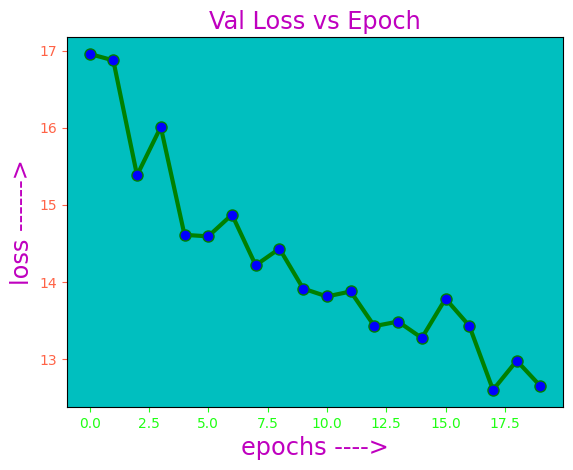

In [13]:
train(dataset,valdataset, model)

In [15]:
# Saving labels to label value as a json
main_dir = os.listdir(os.path.join("minidataset","train"))
reference = {}
for i,dir in enumerate(main_dir):
    reference[dir]=i
with open('labels.json', 'wb') as iw:
    pickle.dump(reference, iw)

FileNotFoundError: [Errno 2] No such file or directory: 'minidataset/train'